__ Moran’s I __ measures the global spatial autocorrelation in an attribute y measured over n spatial units and is given as:

$$ I =  n/S_0  \sum_{i}\sum_j z_i w_{i,j} z_j / \sum_i z_i z_i$$

where $w_{i,j}$ is a spatial weight, $z_i = y_i - \bar{y}$, and $S_0=\sum_i\sum_j w_{i,j}$. 

We illustrate the use of Moran’s I with a case study of homicide rates for a group of 78 counties surrounding St. Louis over the period 1988-93. 

In [3]:
% matplotlib inline

In [4]:
import pysal
import numpy as np
import matplotlib.pylab as plt


In [5]:
f = pysal.open(pysal.examples.get_path("stl_hom.txt"))

In [6]:
y = np.array(f.by_col['HR8893'])

In [7]:
w = pysal.open(pysal.examples.get_path("stl.gal")).read()

In [38]:
mi = pysal.Moran(y, w,  two_tailed=False)
print "%.3f"%mi.I

print mi.EI

print "%.5f"%mi.p_norm


0.244
-0.012987012987
0.00014


In [27]:
np.random.seed(10)
mir = pysal.Moran(y, w, permutations = 9999)

In [45]:
#  Alternatively, we could use the realized values for I from the permutations 
#  and compare the original I using a z-transformation to get:

print mir.EI_sim
print mir.z_sim
print mir.p_z_sim
mir.p_sim

-0.0118217511619
4.55451777821
2.62529422013e-06


0.0022000000000000001

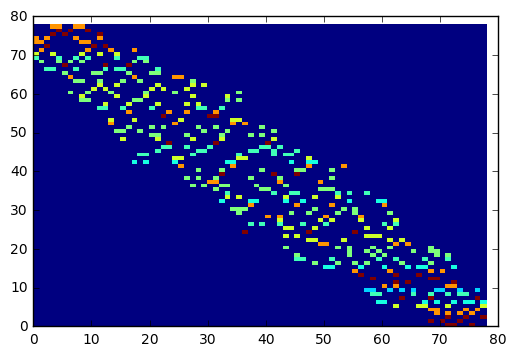

In [48]:
plt.pcolor(np.fliplr(w.full()[0]))